### Create new features and columns, using apple stock data  

In [66]:
#import the package "Pandas" & "Matplotlib" into Jupiter Notebook
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
#import CSV data
data = pd.read_csv('AAPL.csv')

In [68]:
#show all data table
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-04,182.630005,182.940002,179.119995,179.699997,178.663071,99310400
1,2022-01-05,179.610001,180.169998,174.639999,174.919998,173.910660,94537600
2,2022-01-06,172.699997,175.300003,171.639999,172.000000,171.007507,96904000
3,2022-01-07,172.889999,174.139999,171.029999,172.169998,171.176514,86709100
4,2022-01-10,169.080002,172.500000,168.169998,172.190002,171.196426,106765600


In [69]:
#get data information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 12.8+ KB


### Create new column - Price difference

In [70]:
data['PriceDiff'] = data['Close'].shift(-1) - data['Close']

In [71]:
#show data in new column
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,PriceDiff
0,2022-01-04,182.630005,182.940002,179.119995,179.699997,178.663071,99310400,-4.779999
1,2022-01-05,179.610001,180.169998,174.639999,174.919998,173.910660,94537600,-2.919998
2,2022-01-06,172.699997,175.300003,171.639999,172.000000,171.007507,96904000,0.169998
3,2022-01-07,172.889999,174.139999,171.029999,172.169998,171.176514,86709100,0.020004
4,2022-01-10,169.080002,172.500000,168.169998,172.190002,171.196426,106765600,2.890000


### Create a new column - Daily return

In [72]:
data['Return'] = data['PriceDiff']/data['Close']

In [73]:
#show new column 
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,PriceDiff,Return
0,2022-01-04,182.630005,182.940002,179.119995,179.699997,178.663071,99310400,-4.779999,-0.026600
1,2022-01-05,179.610001,180.169998,174.639999,174.919998,173.910660,94537600,-2.919998,-0.016693
2,2022-01-06,172.699997,175.300003,171.639999,172.000000,171.007507,96904000,0.169998,0.000988
3,2022-01-07,172.889999,174.139999,171.029999,172.169998,171.176514,86709100,0.020004,0.000116
4,2022-01-10,169.080002,172.500000,168.169998,172.190002,171.196426,106765600,2.890000,0.016784


### Create a new column using List Comprehension - Direction 

In [74]:
#the List Comprehension means: if the price difference is larger than 0, denote as 1, otherwise, denote as 0
data['Direction'] = [1 if data['PriceDiff'].loc[ei] > 0 else 0 for ei in data.index]

In [75]:
#show new column Dirrection
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,PriceDiff,Return,Direction
0,2022-01-04,182.630005,182.940002,179.119995,179.699997,178.663071,99310400,-4.779999,-0.026600,0
1,2022-01-05,179.610001,180.169998,174.639999,174.919998,173.910660,94537600,-2.919998,-0.016693,0
2,2022-01-06,172.699997,175.300003,171.639999,172.000000,171.007507,96904000,0.169998,0.000988,1
3,2022-01-07,172.889999,174.139999,171.029999,172.169998,171.176514,86709100,0.020004,0.000116,1
4,2022-01-10,169.080002,172.500000,168.169998,172.190002,171.196426,106765600,2.890000,0.016784,1


### Create a new column using Rolling Window calculation (.rolling()) - Moving average

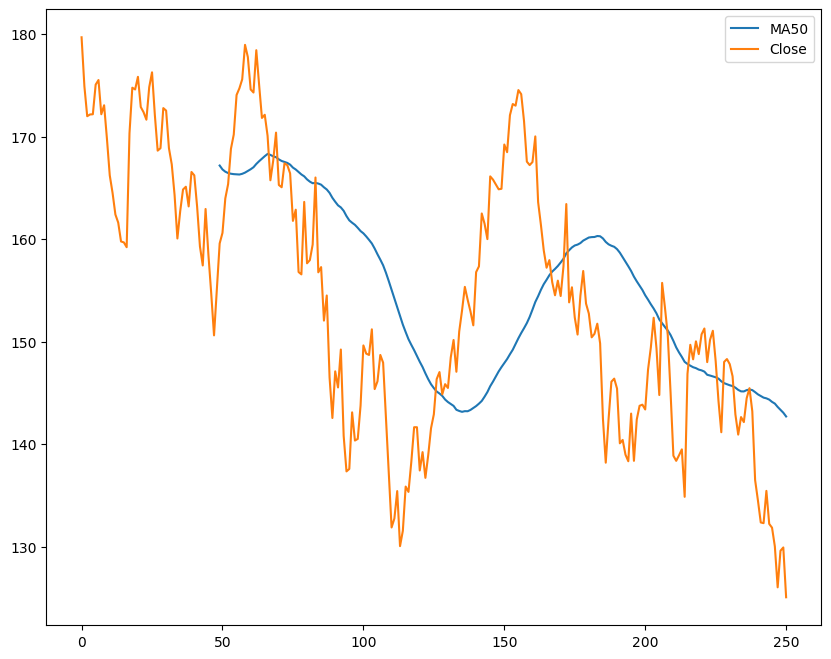

In [76]:
data['ma50'] = data['Close'].rolling(50).mean()

#plot the moving average 
plt.figure(figsize=(10,8))
data['ma50'].loc['0':'252'].plot(label='MA50')
data['Close'].loc['0':'252'].plot(label='Close')
plt.legend()
plt.show()


In [77]:
#graph shows Moving average of 50 days line 
#and Close line 
#between 2022/01/04 - 2023/01/03 